In [13]:
from sklearn.model_selection import train_test_split
from DataLoader import DataLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = "../dataset/splitted-animations"

dl = DataLoader(
            path, 1.0)
full_data = dl.load_dataset()

Loading dataset


  0%|          | 0/9951 [00:00<?, ?it/s]

100%|██████████| 9951/9951 [02:15<00:00, 73.42it/s]


In [17]:
train_data, test_data = train_test_split(
            full_data, test_size=0.40, random_state=42)
test_data, val_data = train_test_split(
    test_data, test_size=0.50, random_state=42)
Y_train, X_train = zip(*train_data)
Y_test, X_test = zip(*test_data)
Y_val, X_val = zip(*val_data)

In [18]:
data = []

for i in range(len(Y_train)):
    data.append({
        "Label" : Y_train[i],
        "Set" : "train",
    })
for i in range(len(Y_test)):
    data.append({
        "Label" : Y_test[i],
        "Set" : "test",
    })

for i in range(len(Y_val)):
    data.append({
        "Label" : Y_val[i],
        "Set" : "val",
    })

data = pd.DataFrame(data)


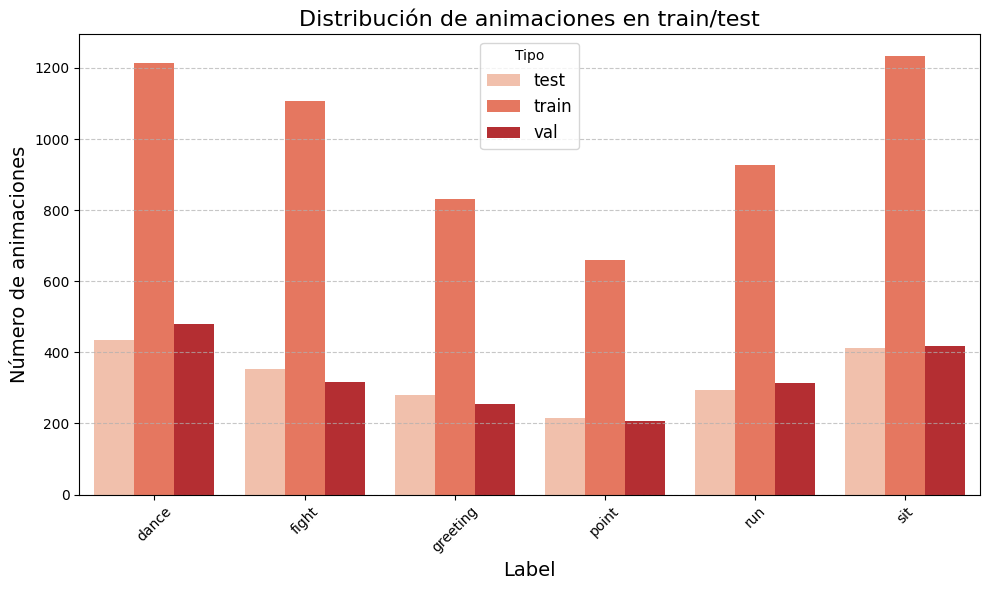

In [19]:
count = data.groupby(["Label", "Set"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 6))

sns.barplot(data=count, x="Label", y="Count", hue="Set", palette="Reds")
plt.xlabel("Label", fontsize=14)
plt.ylabel("Número de animaciones", fontsize=14)
plt.title("Distribución de animaciones en train/test", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(title="Tipo", fontsize=12)
plt.tight_layout()
plt.savefig("./images/muestreo-split.png", dpi=300, bbox_inches='tight')
plt.show()